In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = 8,4


In [4]:
stats = pd.read_csv("DemographicData.csv")

In [7]:
stats.columns = ['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers', 'IncomeGroup']

In [8]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


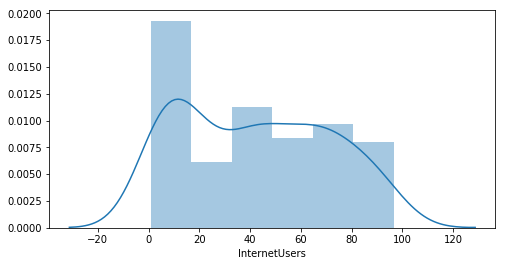

In [12]:
vis1 = sns.distplot(stats["InternetUsers"])

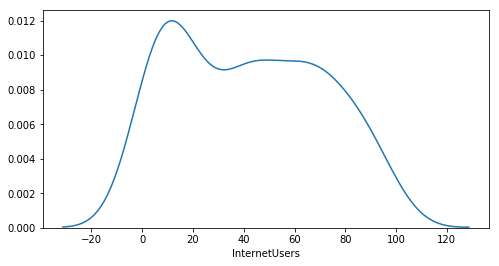

In [14]:
vis1 = sns.distplot(stats["InternetUsers"], hist= False)

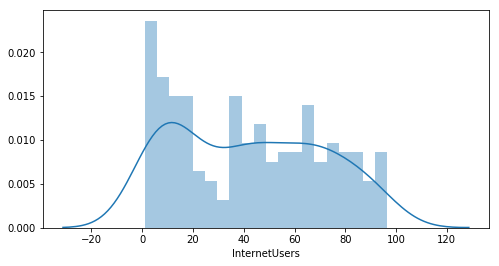

In [16]:
vis1 = sns.distplot(stats["InternetUsers"], bins=20 )

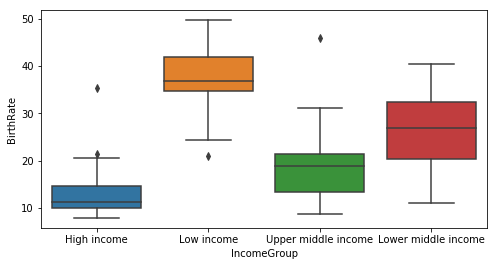

In [18]:
vis2 = sns.boxplot(data=stats, x="IncomeGroup", y="BirthRate")

Seaborn Gallery - check in internet

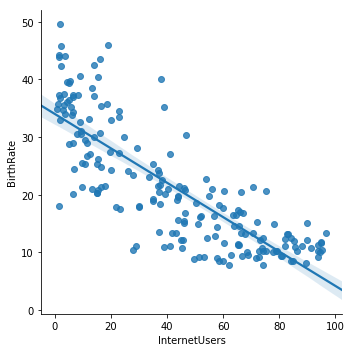

In [20]:
vis3 = sns.lmplot(data = stats, x = "InternetUsers", y= "BirthRate" )

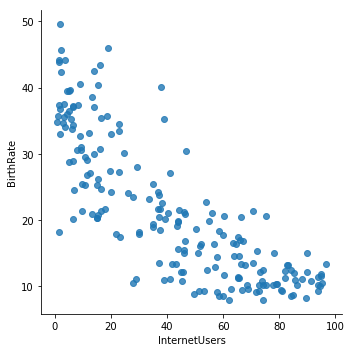

In [21]:
vis3 = sns.lmplot(data = stats, x = "InternetUsers", y= "BirthRate", fit_reg=False )

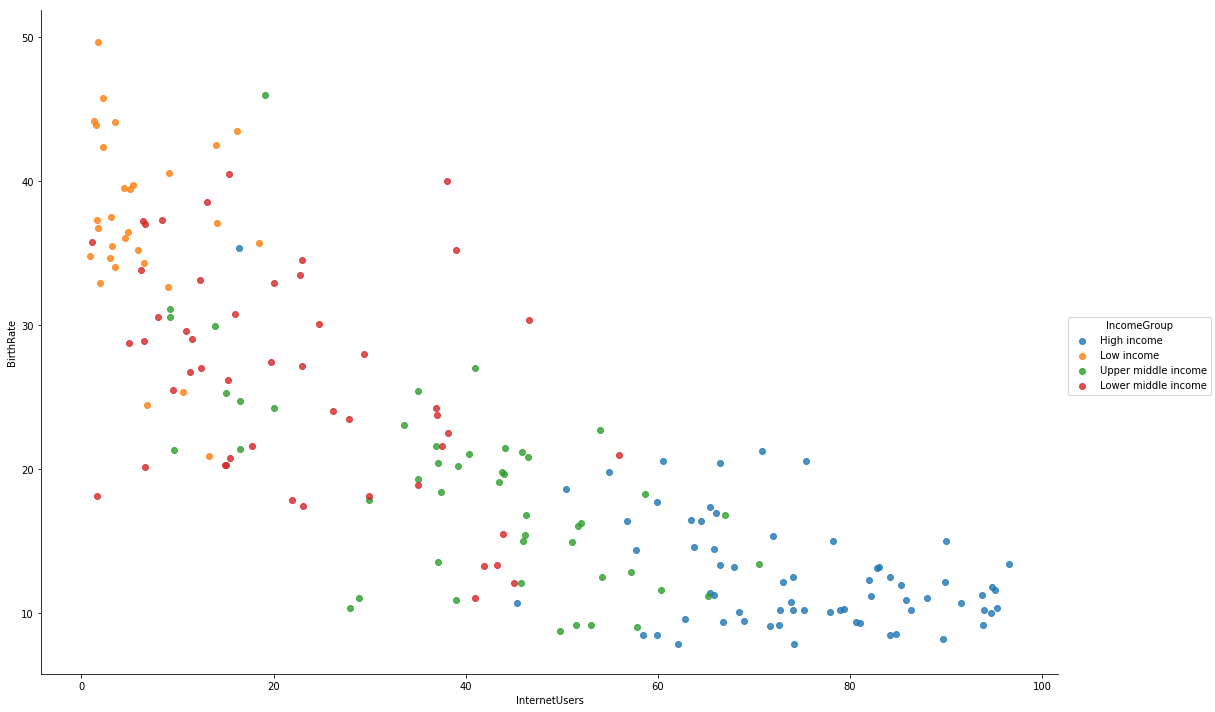

In [26]:
vis3 = sns.lmplot(data = stats, x = "InternetUsers", y= "BirthRate", fit_reg=False, hue="IncomeGroup",  
                  size = 10, aspect=1.5)
# hue - colors
# aspect - ratio of x and y

Seaborn is based on matplotlib and arguments in {scatter,line}_kws are pased to plt

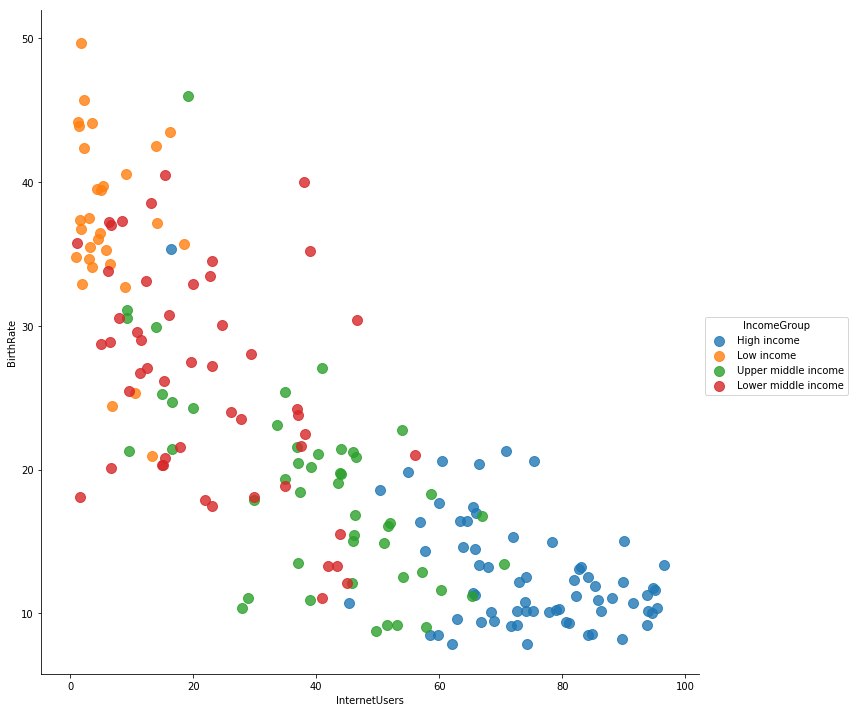

In [30]:
vis3 = sns.lmplot(data = stats, x = "InternetUsers", y= "BirthRate", fit_reg=False, hue="IncomeGroup",  
                  size = 10, scatter_kws={"s":100})

------------------

In [4]:
movies = pd.read_csv("Movie-Ratings.csv")

In [9]:
movies.columns = ["Film", "Genre", "CriticRaiting", "AudienceRaiting", "BudgetMilions", "Year"]

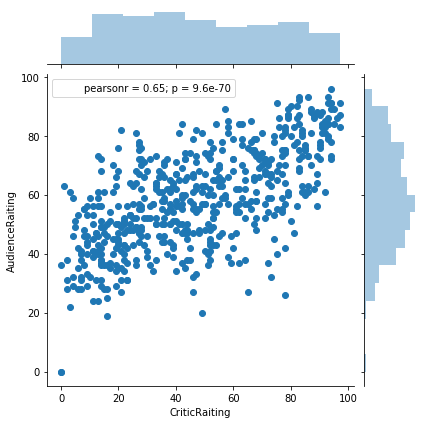

In [11]:
# join plots
j = sns.jointplot(data=movies, x="CriticRaiting", y="AudienceRaiting")

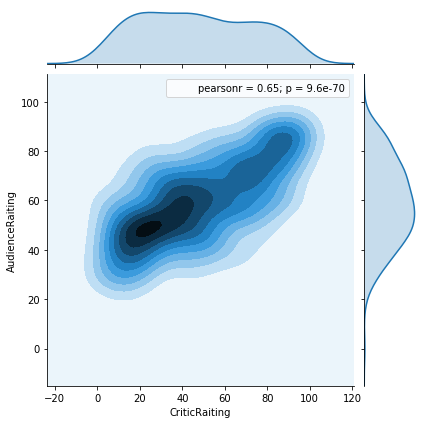

In [12]:
j = sns.jointplot(data=movies, x="CriticRaiting", y="AudienceRaiting", kind="kde")

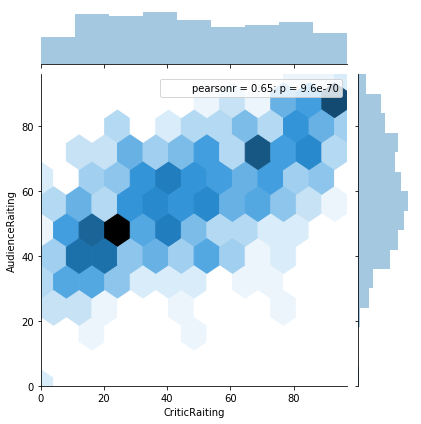

In [13]:
j = sns.jointplot(data=movies, x="CriticRaiting", y="AudienceRaiting", kind="hex")

---

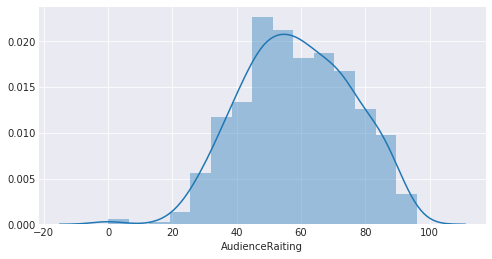

In [16]:
sns.set_style("darkgrid")
# sns.set_style("white")

m1 = sns.distplot(movies.AudienceRaiting, bins=15)

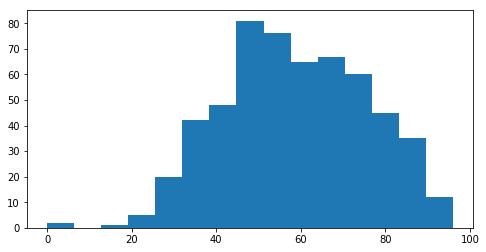

In [15]:
n1 = plt.hist(movies.AudienceRaiting, bins=15)

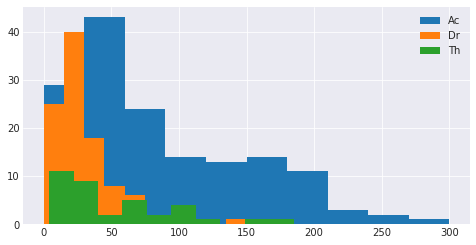

In [22]:
plt.hist(movies[movies.Genre == "Action"].BudgetMilions, label = "Ac")
plt.hist(movies[movies.Genre == "Drama"].BudgetMilions, label = "Dr")
plt.hist(movies[movies.Genre == "Thriller"].BudgetMilions, label = "Th")
plt.legend(loc = "upper right")  # does not work without label
plt.show()

/home/tomasz_bednarski/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


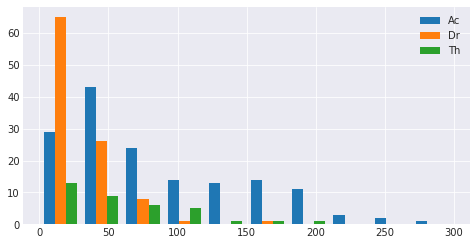

In [26]:
datList = [
    movies[movies.Genre == "Action"].BudgetMilions,
    movies[movies.Genre == "Drama"].BudgetMilions, 
    movies[movies.Genre == "Thriller"].BudgetMilions
    ]
plt.hist(data = movies, x = datList, label= ["Ac", "Dr", "Th"])
plt.legend(loc = "upper right")  # does not work without label
plt.show()

/home/tomasz_bednarski/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


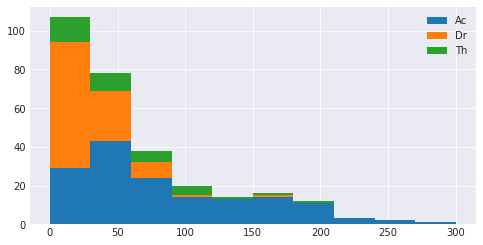

In [27]:
datList = [
    movies[movies.Genre == "Action"].BudgetMilions,
    movies[movies.Genre == "Drama"].BudgetMilions, 
    movies[movies.Genre == "Thriller"].BudgetMilions
    ]
plt.hist(data = movies, x = datList, label= ["Ac", "Dr", "Th"], stacked=True)
plt.legend(loc = "upper right")  # does not work without label
plt.show()

---

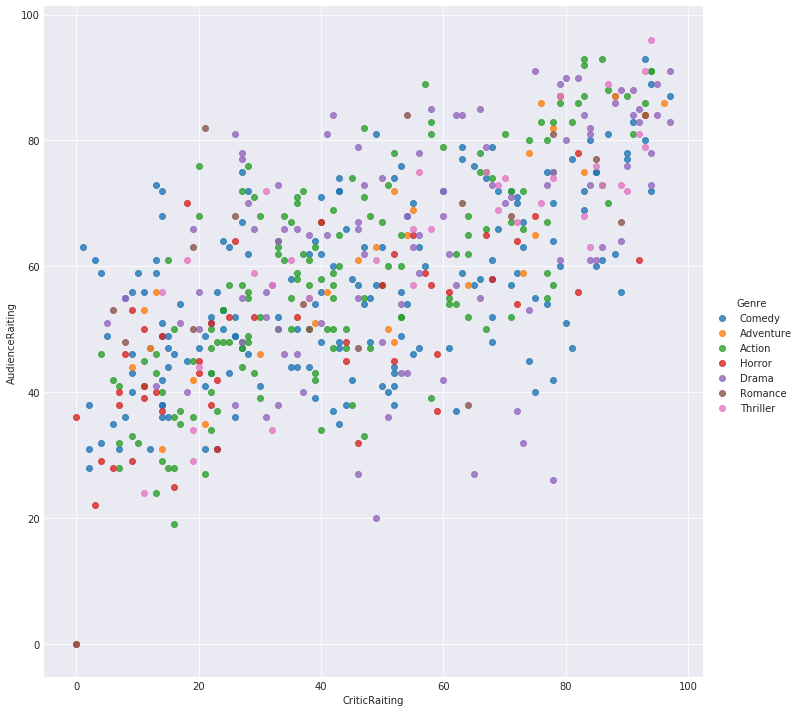

In [30]:
vis1 = sns.lmplot(data=movies, x="CriticRaiting", y="AudienceRaiting", fit_reg=False, hue="Genre", size = 10, aspect=1)

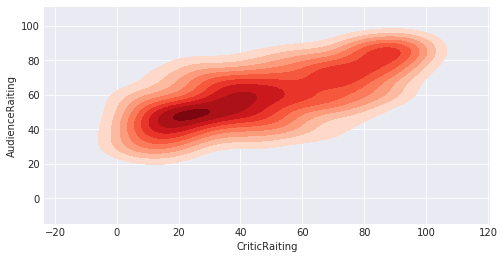

In [34]:
sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, shade = True, shade_lowest=False, cmap="Reds")


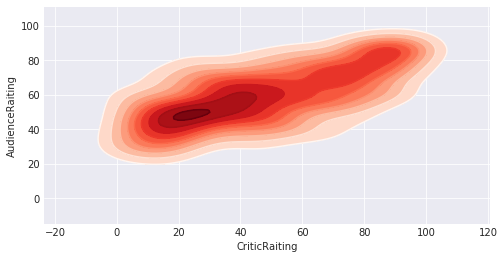

In [35]:
sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, shade = True, shade_lowest=False, cmap="Reds")

#TIP  # smoothing
sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, cmap="Reds")


---

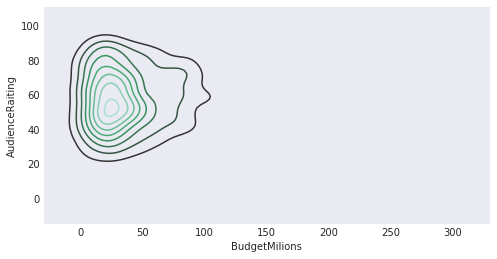

In [38]:
sns.set_style("dark")
sns.kdeplot(movies.BudgetMilions, movies.AudienceRaiting, shade = False, shade_lowest=False)


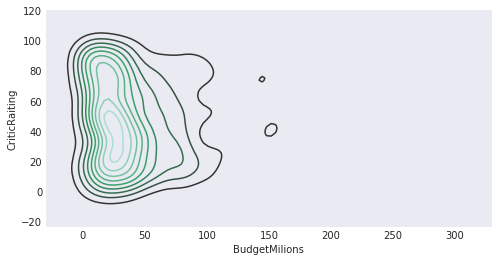

In [39]:
sns.kdeplot(movies.BudgetMilions, movies.CriticRaiting, shade = False, shade_lowest=False)

[(-20, 160)]

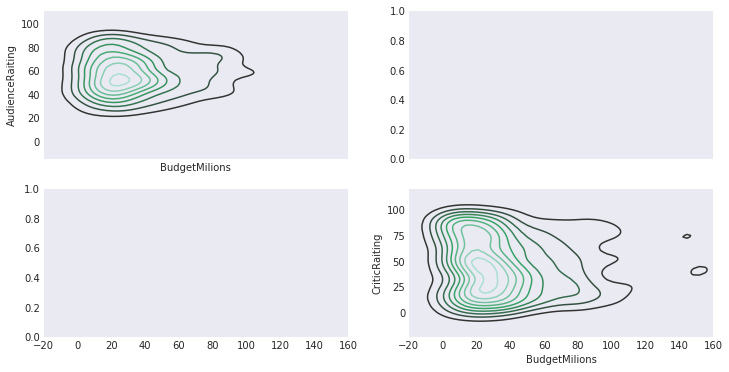

In [48]:
f, axes = plt.subplots(2,2, figsize=(12,6), sharex = True)
k1 = sns.kdeplot(movies.BudgetMilions, movies.AudienceRaiting, shade = False, shade_lowest=False, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMilions, movies.CriticRaiting, shade = False, shade_lowest=False, ax=axes[1,1])
k1.set(xlim=(-20,160))

---

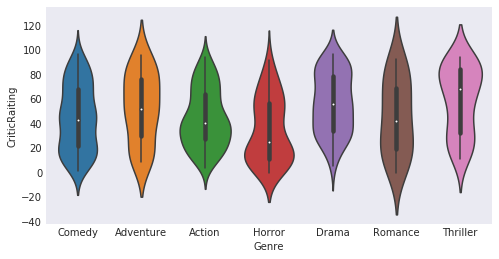

In [49]:
v = sns.violinplot(data=movies, x="Genre", y="CriticRaiting")

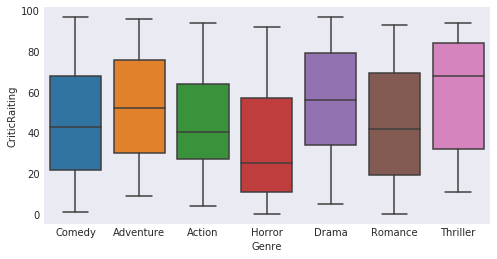

In [50]:
b = sns.boxplot(data=movies, x="Genre", y="CriticRaiting")

---

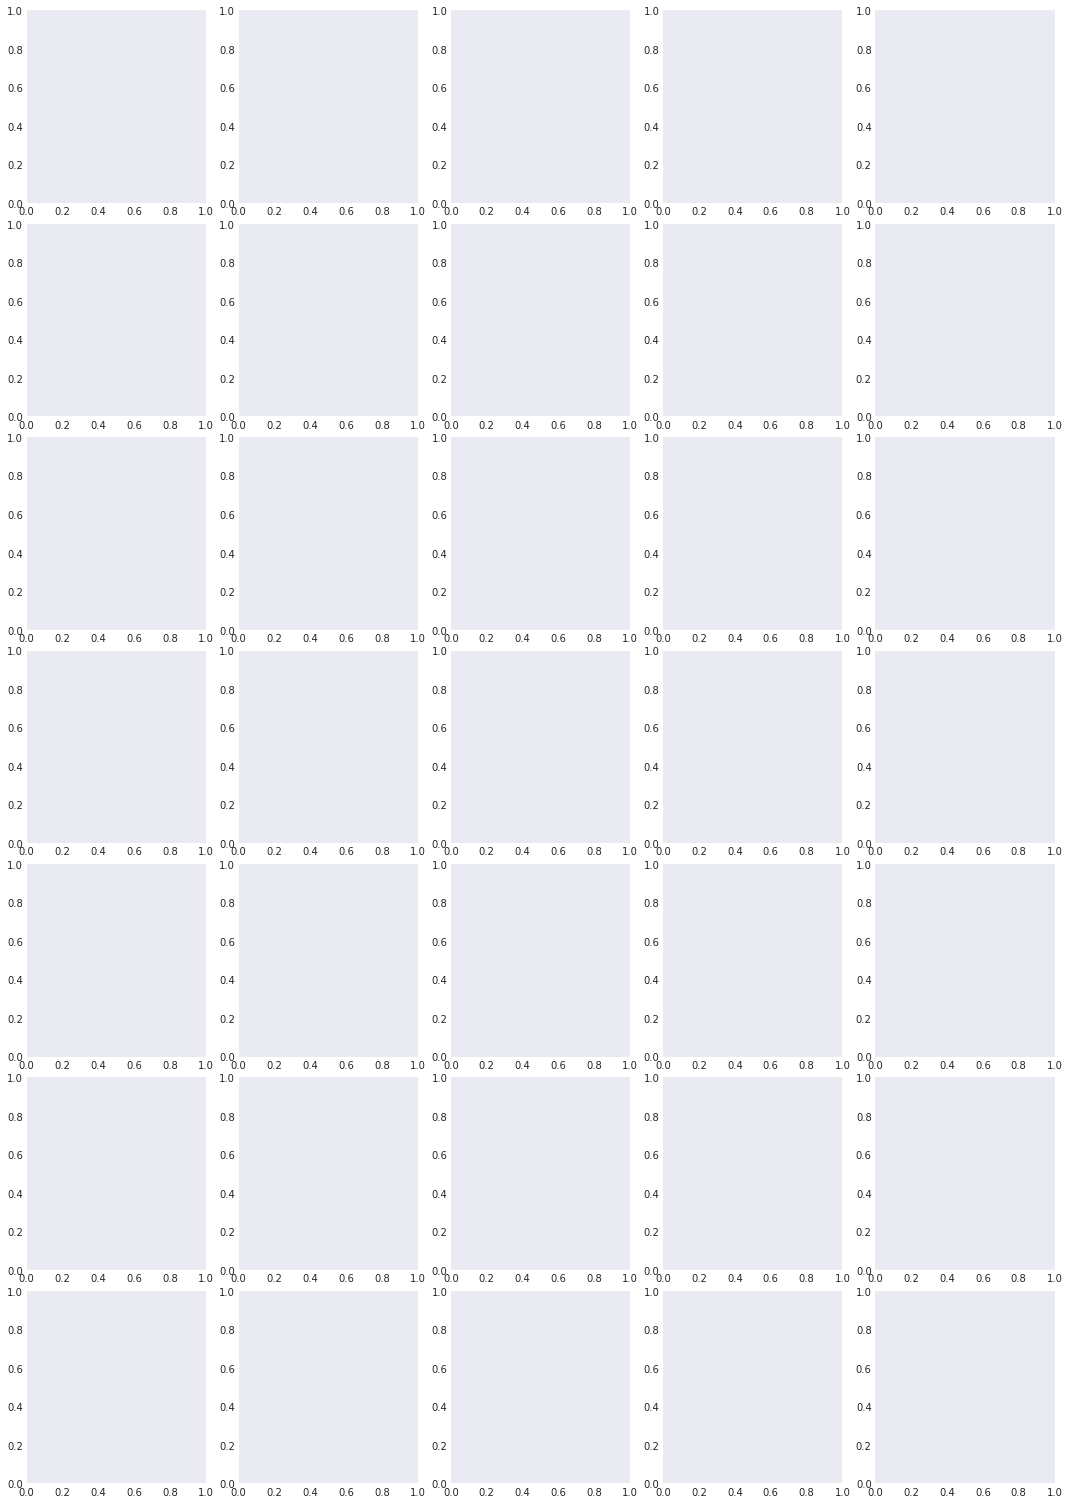

In [52]:
g = sns.FacetGrid(movies, row = "Genre", col = "Year", hue="Genre")

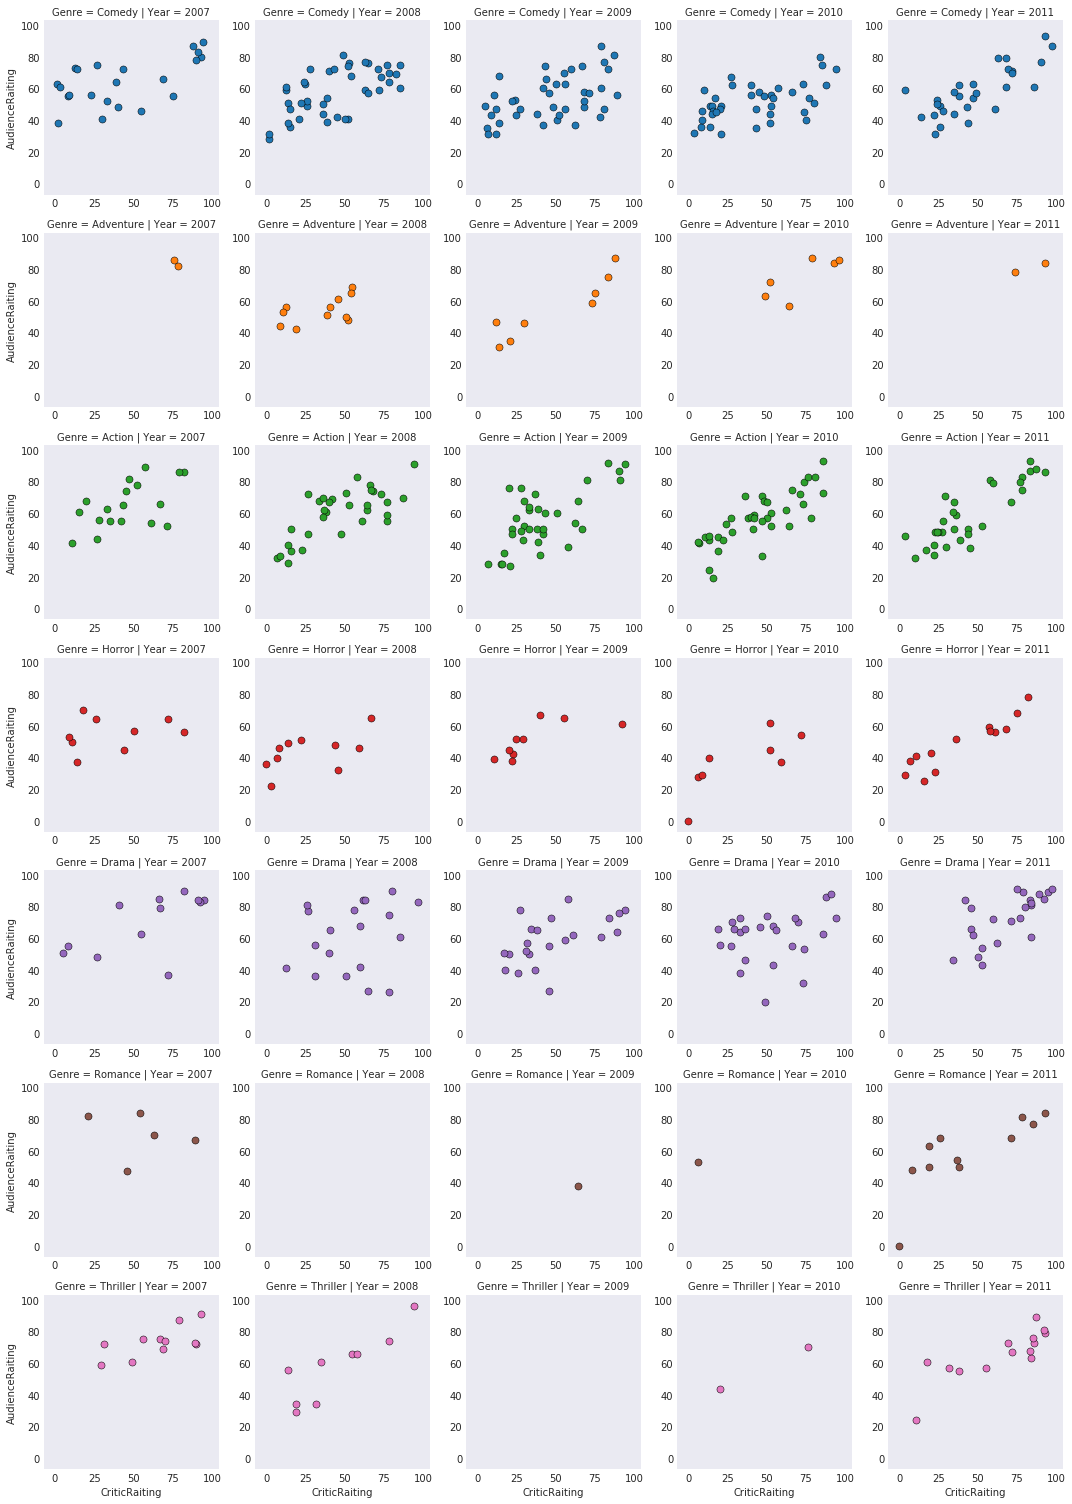

In [58]:
grid = sns.FacetGrid(movies, row = "Genre", col = "Year", hue="Genre")
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black" )
grid = grid.map(plt.scatter, "CriticRaiting", "AudienceRaiting", **kws)

---

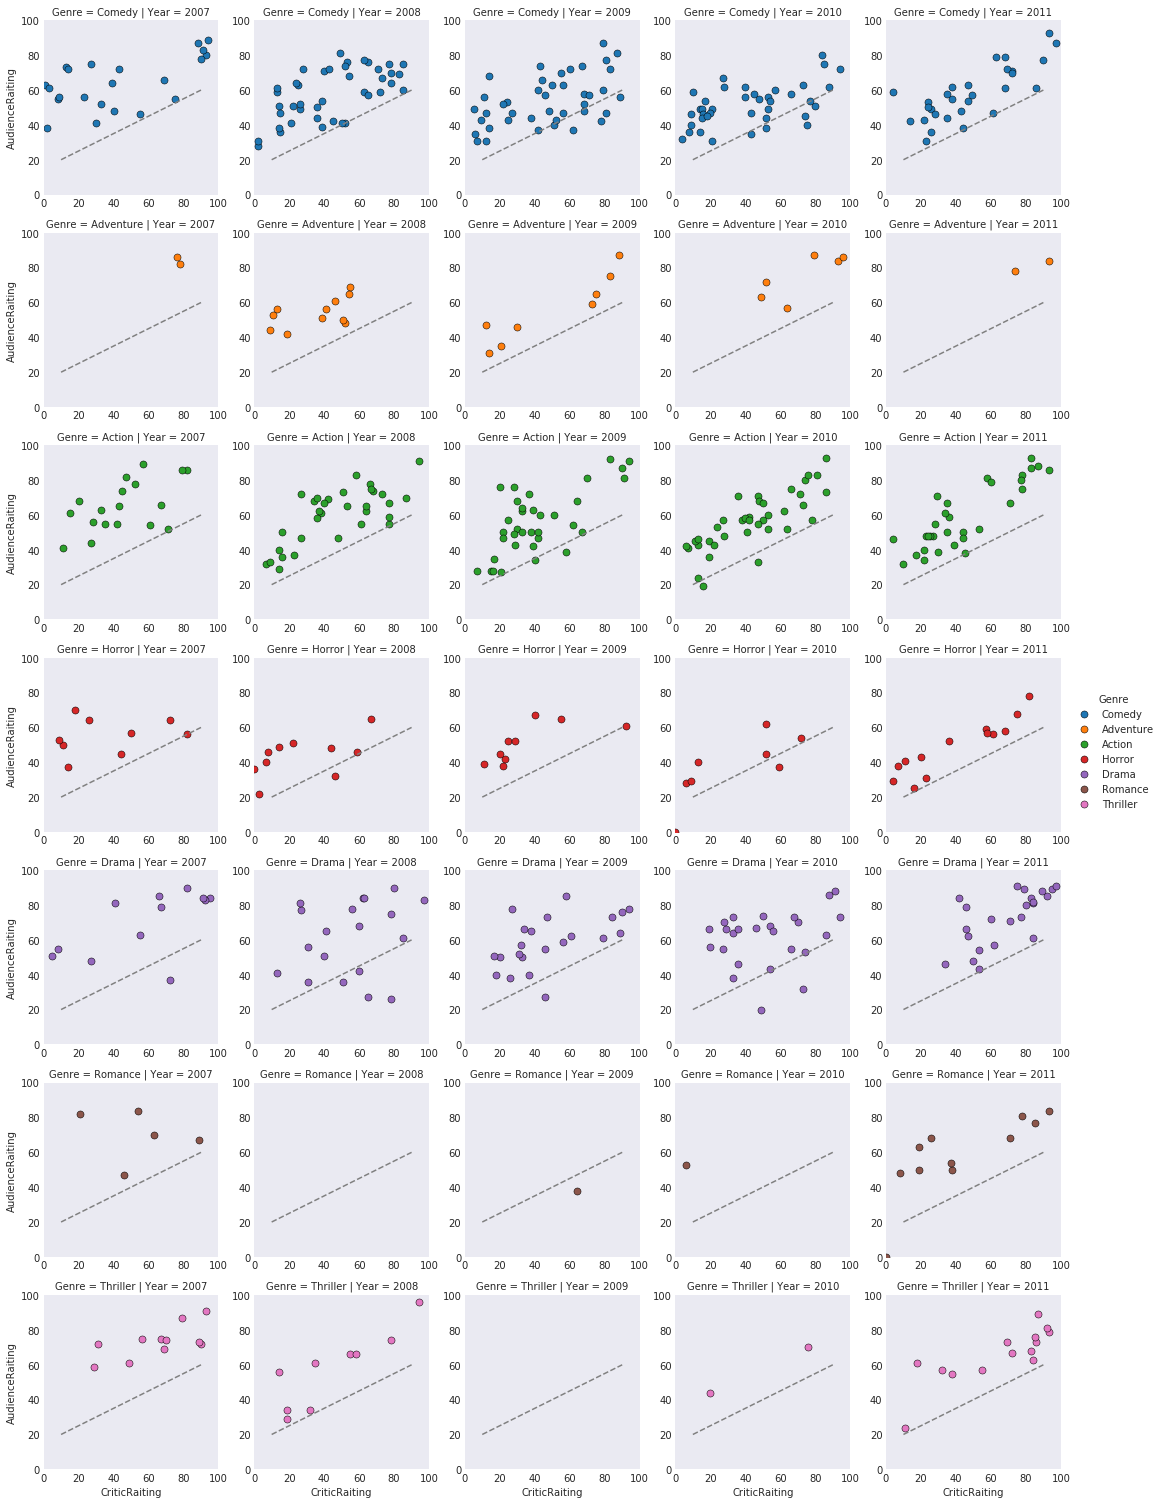

In [63]:
grid = sns.FacetGrid(movies, row = "Genre", col = "Year", hue="Genre")
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black" )
grid = grid.map(plt.scatter, "CriticRaiting", "AudienceRaiting", **kws)
grid.set(xlim=(0,100), ylim=(0,100))

for ax in grid.axes.flat:  # 2 dim -> 1 dim
    ax.plot((10,90), (20,60), c="grey", ls="--")
    
grid.add_legend()